In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report
from plotly.offline import iplot
import plotly.graph_objs as go
from plotly import tools

In [186]:
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [187]:
pd.DataFrame(X).head()

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


In [188]:
fig = go.Figure([
    go.Scatter(x=X[:, 0][y==0], y=X[:, 1][y==0], name='0', mode='markers', marker_symbol='circle-open', marker_color='crimson'),
    go.Scatter(x=X[:, 0][y==1], y=X[:, 1][y==1], name='1', mode='markers', marker_symbol='x-thin-open', marker_color='steelblue')
])
fig.show()

In [189]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.theta = None
        self._alpha = alpha
        self._n_iters = n_iters
    def gradient_step(self, theta, theta_grad):
        return theta - self._alpha * theta_grad
    def optimize(self, X, y, start_theta, n_iters):
        theta = start_theta.copy()
        for i in range(n_iters):
            theta_grad = self.grad_func(X, y, theta)
            theta = self.gradient_step(theta, theta_grad)
        return theta
    def fit(self, X, y):
        m = X.shape[1]
        start_theta = np.ones(m)
        self.theta = self.optimize(X, y, start_theta, self._n_iters)

In [190]:
class LogReg(SGD):
    def sigmoid(self, X, theta):        
        return 1. / (1. + np.exp(-X.dot(theta)))
    def grad_func(self, X, y, theta):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, theta) - y)
        return grad
    def predict_proba(self, X):
        return self.sigmoid(X, self.theta)
    def predict(self, X, threshold = 0.5):
        y_pred = self.predict_proba(X) > threshold
        return y_pred

In [191]:
logreg = LogReg()
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
logreg.fit(X, y)
y_pred = logreg.predict(X)

In [192]:
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


In [193]:
y_pred_proba = logreg.predict_proba(X)

In [194]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01), 
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

In [195]:
XX

array([[ 1.        , -6.03367039, -5.76154392],
       [ 1.        , -6.02367039, -5.76154392],
       [ 1.        , -6.01367039, -5.76154392],
       ...,
       [ 1.        ,  5.72632961,  6.62845608],
       [ 1.        ,  5.73632961,  6.62845608],
       [ 1.        ,  5.74632961,  6.62845608]])

In [196]:
Z = logreg.fit(X,y)
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)

In [130]:
fig = go.Figure([
    go.Heatmap(x=xx[0], y=yy, z=Z, colorscale='Jet', showscale=True),
    go.Scatter(x=X[:, 0][y==0], y=X[:, 1][y==0], name='0', mode='markers', marker_symbol='circle-open', marker_color='crimson'),
    go.Scatter(x=X[:, 0][y==1], y=X[:, 1][y==1], name='1', mode='markers', marker_symbol='x-thin-open', marker_color='steelblue')
])
fig.show()

TypeError: ignored

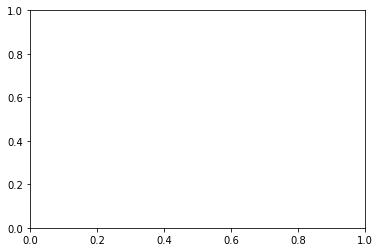

In [180]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.2)

In [198]:
model = LogisticRegression()

In [199]:
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)

Выведите результаты работы библиотечной модели - в численном и в графическом виде.








In [214]:
ac_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y, y_pred)
print(f'accuracy = {ac_lr:.2f} F1-score = {f1_lr:.2f}')

accuracy = 0.97 F1-score = 0.76


In [215]:
y_pred_proba = logreg.predict_proba(X_test)

In [216]:
xx, yy = np.meshgrid(
    np.arange(X_test.min(axis=0)[1]-1, X_test.max(axis=0)[1]+1, 0.01), 
    np.arange(X_test.min(axis=0)[2]-1, X_test.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

In [217]:
Z = logreg.fit(X_test,y_test)
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)

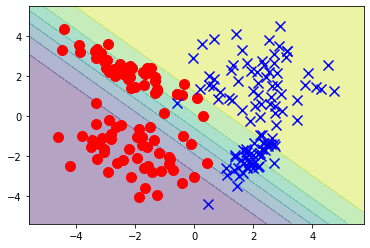

In [218]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_test[:, 1][y_test==0], X_test[:, 2][y_test==0], marker="o", c='r', s=100)
plt.scatter(X_test[:, 1][y_test==1], X_test[:, 2][y_test==1], marker="x", c='b', s=100)

Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [219]:
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [220]:
class SGD():
    def __init__(self, alpha=0.00005, n_iters=1000):
        self.theta = None
        self._alpha = alpha
        self._n_iters = n_iters
    def gradient_step(self, theta, theta_grad):
        return theta - self._alpha * theta_grad
    def optimize(self, X, y, start_theta, n_iters):
        theta = start_theta.copy()
        for i in range(n_iters):
            theta_grad = self.grad_func(X, y, theta)
            theta = self.gradient_step(theta, theta_grad)
        return theta
    def fit(self, X, y):
        m = X.shape[1]
        start_theta = np.ones(m)
        self.theta = self.optimize(X, y, start_theta, self._n_iters)

In [221]:
class LogReg(SGD):
    def sigmoid(self, X, theta):        
        return 1. / (1. + np.exp(-X.dot(theta)))
    def grad_func(self, X, y, theta):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, theta) - y)
        return grad
    def predict_proba(self, X):
        return self.sigmoid(X, self.theta)
    def predict(self, X, threshold = 0.5):
        y_pred = self.predict_proba(X) > threshold
        return y_pred

In [222]:
logreg = LogReg()
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
logreg.fit(X, y)
y_pred = logreg.predict(X)

In [223]:
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.72 F1-score = 0.76


In [224]:
y_pred_proba = logreg.predict_proba(X)

In [225]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01), 
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

In [226]:
Z = logreg.fit(X,y)
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)

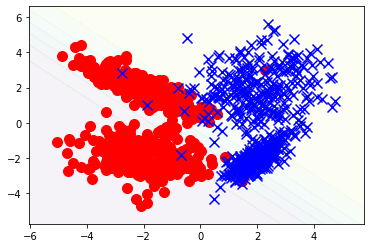

In [227]:
plt.contourf(xx, yy, Z, alpha=0.05)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.

In [228]:
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [229]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.theta = None
        self._alpha = alpha
        self._n_iters = n_iters
    def gradient_step(self, theta, theta_grad):
        return theta - self._alpha * theta_grad
    def optimize(self, X, y, start_theta, n_iters):
        theta = start_theta.copy()
        for i in range(n_iters):
            theta_grad = self.grad_func(X, y, theta)
            theta = self.gradient_step(theta, theta_grad)
        return theta
    def fit(self, X, y):
        X =np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
        m = X.shape[1]
        start_theta = np.ones(m)
        self.theta = self.optimize(X, y, start_theta, self._n_iters)

In [230]:
class LogReg(SGD):
    def sigmoid(self, X, theta):        
        return 1. / (1. + np.exp(-X.dot(theta)))
    def grad_func(self, X, y, theta):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, theta) - y)
        return grad
    def predict_proba(self, X):
        X =np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
        return self.sigmoid(X, self.theta)   
    def predict(self, X, threshold = 0.5): 
        y_pred = self.predict_proba(X) > threshold
        return y_pred

In [231]:
logreg = LogReg()
X =np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
logreg.fit(X, y)
y_pred = logreg.predict(X)

In [232]:
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


In [233]:
y_pred_proba = logreg.predict_proba(X)

In [234]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[0]-1, X.max(axis=0)[0]+1, 0.01), 
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

In [235]:
XX

array([[ 1.        ,  0.        , -6.03367039],
       [ 1.        ,  0.01      , -6.03367039],
       [ 1.        ,  0.02      , -6.03367039],
       ...,
       [ 1.        ,  1.97      ,  5.74632961],
       [ 1.        ,  1.98      ,  5.74632961],
       [ 1.        ,  1.99      ,  5.74632961]])

In [237]:
Z = logreg.fit(X,y)
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)

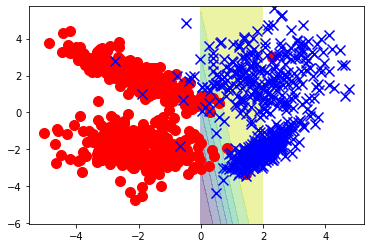

In [238]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

In [239]:
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=9,
                          random_state=1)

In [240]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.theta = None
        self._alpha = alpha
        self._n_iters = n_iters
    def gradient_step(self, theta, theta_grad):
        return theta - self._alpha * theta_grad
    def optimize(self, X, y, start_theta, n_iters):
        theta = start_theta.copy()
        for i in range(n_iters):
            theta_grad = self.grad_func(X, y, theta)
            theta = self.gradient_step(theta, theta_grad)
        return theta
    def fit(self, X, y):
        m = X.shape[1]
        start_theta = np.ones(m)
        self.theta = self.optimize(X, y, start_theta, self._n_iters)

In [241]:
class LogReg(SGD):
    def sigmoid(self, X, theta):        
        return 1. / (1. + np.exp(-X.dot(theta)))
    def grad_func(self, X, y, theta):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, theta) - y)
        return grad
    def predict_proba(self, X):
        return self.sigmoid(X, self.theta)
    def predict(self, X, threshold = 0.5):
        y_pred = self.predict_proba(X) > threshold
        return y_pred

In [242]:
logreg = LogReg()
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
logreg.fit(X, y)
y_pred = logreg.predict(X)

In [243]:
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 1.00 F1-score = 1.00


In [244]:
y_pred_proba = logreg.predict_proba(X)

In [245]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01), 
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

In [246]:
Z = logreg.fit(X,y)
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)

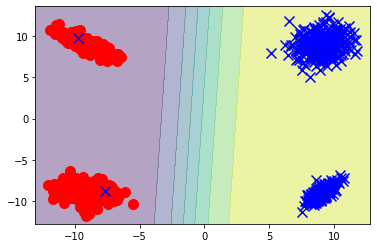

In [247]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.

In [248]:
X,y = make_classification (n_samples=80000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [249]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.theta = None
        self._alpha = alpha
        self._n_iters = n_iters
    def gradient_step(self, theta, theta_grad):
        return theta - self._alpha * theta_grad
    def optimize(self, X, y, start_theta, n_iters):
        theta = start_theta.copy()
        for i in range(n_iters):
            theta_grad = self.grad_func(X, y, theta)
            theta = self.gradient_step(theta, theta_grad)
        return theta
    def fit(self, X, y):
        m = X.shape[1]
        start_theta = np.ones(m)
        self.theta = self.optimize(X, y, start_theta, self._n_iters)

In [250]:
class LogReg(SGD):
    def sigmoid(self, X, theta):        
        return 1. / (1. + np.exp(-X.dot(theta)))
    def grad_func(self, X, y, theta):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, theta) - y)
        return grad
    def predict_proba(self, X):
        return self.sigmoid(X, self.theta)
    def predict(self, X, threshold = 0.5):
        y_pred = self.predict_proba(X) > threshold
        return y_pred

In [251]:
logreg = LogReg()
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
logreg.fit(X, y)
y_pred = logreg.predict(X)

In [252]:
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.99 F1-score = 0.99


In [253]:
y_pred_proba = logreg.predict_proba(X)

In [254]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01), 
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

In [255]:
Z = logreg.fit(X,y)
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)

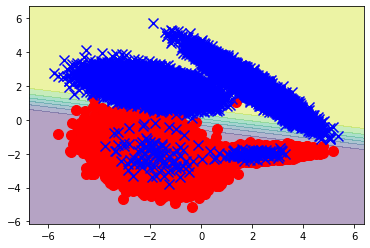

In [256]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.

In [263]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
model = LogisticRegression()
ovr = OneVsRestClassifier(model)
ovr.fit(X, y)
yhat = ovr.predict(X)

In [264]:
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average='micro')
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.31 F1-score = 0.31


In [265]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01), 
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])
XX

array([[ 1.        , -8.97936383, -7.01674626],
       [ 1.        , -8.96936383, -7.01674626],
       [ 1.        , -8.95936383, -7.01674626],
       ...,
       [ 1.        ,  5.31063617,  5.38325374],
       [ 1.        ,  5.32063617,  5.38325374],
       [ 1.        ,  5.33063617,  5.38325374]])

Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression.

In [260]:
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)
#X = np.arange(10).reshape(-1, 1)
#y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [261]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X, y)
np.around(model.predict_proba(X), decimals = 3)

array([[0.004, 0.996],
       [0.986, 0.014],
       [0.792, 0.208],
       ...,
       [0.   , 1.   ],
       [0.997, 0.003],
       [0.996, 0.004]])

In [262]:
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       499
           1       0.97      0.98      0.98       501

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

